# ТРЕХМЕРНАЯ ГЕОМЕТРИЯ
## Теоретическая часть: Ответьте на вопросы
#### 1. Каким уравнением задается прямая на плоскости? 
Общее уравнение прямой ax+by+c=0, где постоянные A и B не равны нулю одновременно

#### 2. В чем отличие уравнений y=kx+b и ax+by+c=0?
В первом случае уравнение прямой с угловым коффициентом, во втором общее уравнение прямой

#### 3. Запишите уравнение плоскости в трехмерном пространстве, гиперплоскости в многомерном пространстве.
#### В пространстве какой размерности задается гиперплоскость из предыдущего вопроса?
Уравнение плоскости в тремерном пространстве ax+by+cz+d=0
Уравнение гиперплоскости в многомерном пространстве n1x1+n2x2+...+nkxk=d=n1X1+n2X2+...+nkXk

В предыдущем вопросе речь идет о прямой, прямая есть гиперплоскость для двумерного пространтства

#### 4. Если какой-то из коэффициентов равен 0, что это геометрически означает?
Если какой то коэффициент равен 0 то это означает что плоскость параллельна одной из осей координат

#### 5. Что означает, что свободный член равен 0?
Если свободный член равен 0, то это означает, что плоскость проходит через начало координат

## Практическая часть: визуализация функции от двух переменных

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = (11.5, 8.5)

In [7]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

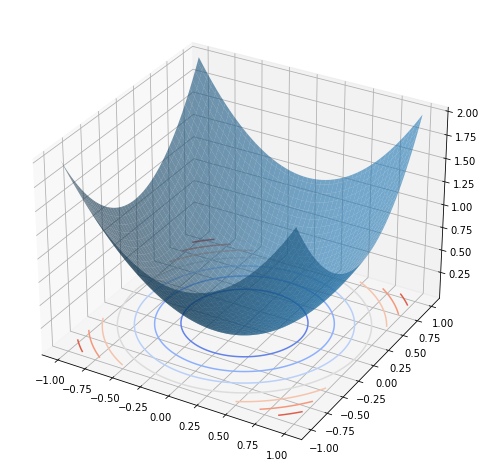

In [68]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

##### Нарисуйте плоскость y=x1+2x2+3:

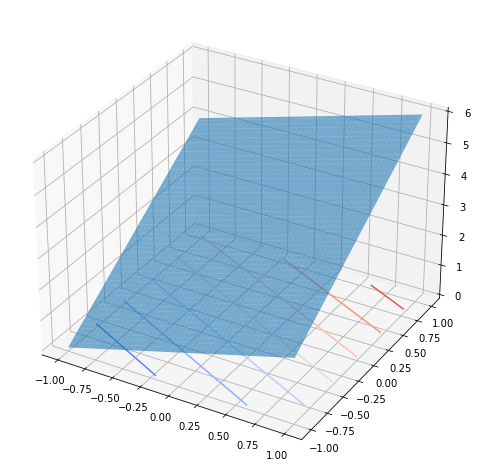

In [9]:
fun = lambda x1, x2: x1 + 2*x2 +3
plot_3d(fun)

##### Нарисуйте плоскость, параллельную любой из горизонтальных осей:
Предположим что работаем с абcолютно ровной плоскостью которую можно задать уравнение у=bx1+cx2+d
для того, чтобы плоскость была паралельна к примеру оси Oz 
нужно задать коэффициент с =0 или у=bx1+d


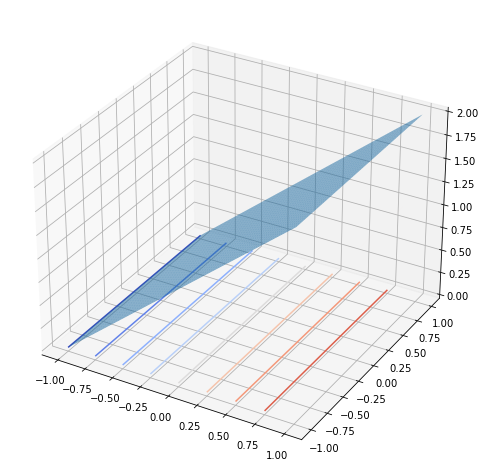

In [10]:
fun = lambda x1, x2: x1 + 1
plot_3d(fun)

##### Нарисуйте плоскость, проходящую через начало координат:
Предположим что работаем с абcолютно ровной плоскостью которую можно задать уравнение у=bx1+cx2+d для того, чтобы плоскость проходила через начало координат необходимо чтобы свободный член был равен 0 или у=bx1+cx2

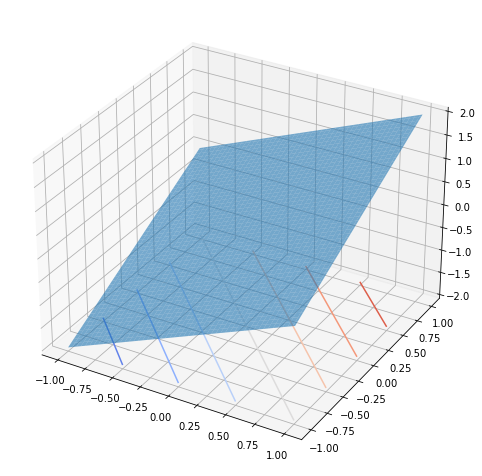

In [11]:
fun = lambda x1, x2: x1 + x2
plot_3d(fun)

на визуализации не очевидно что плоскость проходит через начало координат

# Градиентный спуск

## Теоретическая часть

Градиент функции f(x)=f(x1,…,xd) от многих переменных в точке x0 - это вектор ее частных производных, вычисленных в точке x0.

∇xf∣∣x0=(∂f∂x1,…,∂f∂xd)∣∣∣x0

Разберем два простых примера вычисления градиента в случае функции от двух переменных.

Задача 1.
Найдите градиент линейной функции f(x)=f(x1,x2)=c1x1+c2x2 (c1 и c2 - фиксированные числа).

Задача 2.
Найдите градиент квадратичной функции f(x)=f(x1,x2)=c1x21+c2x22 (c1 и c2 - фиксированные числа).

Ясно, что минимум такой квадратичной функции достигается в 0. Наша следующая цель - найти этот минимум с помощью градиентного спуска.

Вспомните из лекции:

Какую (оптимизационную) задачу решает градиентный спуск?
Как работает алгоритм градиентного спуска?
Как выбирать начальную инициализацию в градиентном спуске?
Когда останавливать градиентный спуск?

## Практическая часть

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай произвольных коэффициентов:


In [12]:
def fun(x1, x2, c1=1, c2=1):
    return c1*(x1**2) + c2*(x2**2)

In [13]:
fun(2,2)


8

Эта функция способна обрабатывать x1 и x2 любой размерности, но градиенты будем считать в предположении, что x1 и x2 - числа (так проще)

Теперь надо реализовать градиент функции fun. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [14]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### student's code here
    return np.array([c1*2*x1, c2*2*x2])
   
    #pass

Проверьте правильность (сверьте с формулой):

In [36]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([2., 9.])

In [17]:
grad_fun(x1=2, x2=1.4, c1=2, c2=3)

array([8. , 8.4])

In [18]:
np.random.rand(2)*4-2

array([-0.74339856,  0.8386294 ])

Теперь реализуем градиентный спуск. Он работает следующим образом:

сначала инициализируется начальная точка x (это уже сделано)
затем повторяются итерации:
x=x−α∇xf
Здесь α - длина шага.
Допишите функцию согласно описанию:

In [69]:
def grad_descent(gr_fun, step_size=0.1, num_steps=50):
    
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итерации,
    нулевой элемент - случайная инициализация
    """
    
    x = np.random.rand(2) * 4 - 2 ### student's code here
    trace = []
    for i in range(num_steps + 1):
        y = fun (x[0],x[1])
        trace.append(x[0])
        trace.append(x[1])
        x = x - step_size * gr_fun(x[0],x[1])
    trace = np.array(trace)
    return trace.reshape((num_steps+1), 2)


In [70]:
a=grad_descent(grad_fun)
a

array([[-8.84644237e-01, -1.25635507e+00],
       [-7.07715390e-01, -1.00508406e+00],
       [-5.66172312e-01, -8.04067246e-01],
       [-4.52937849e-01, -6.43253797e-01],
       [-3.62350280e-01, -5.14603037e-01],
       [-2.89880224e-01, -4.11682430e-01],
       [-2.31904179e-01, -3.29345944e-01],
       [-1.85523343e-01, -2.63476755e-01],
       [-1.48418675e-01, -2.10781404e-01],
       [-1.18734940e-01, -1.68625123e-01],
       [-9.49879517e-02, -1.34900099e-01],
       [-7.59903613e-02, -1.07920079e-01],
       [-6.07922891e-02, -8.63360631e-02],
       [-4.86338313e-02, -6.90688505e-02],
       [-3.89070650e-02, -5.52550804e-02],
       [-3.11256520e-02, -4.42040643e-02],
       [-2.49005216e-02, -3.53632515e-02],
       [-1.99204173e-02, -2.82906012e-02],
       [-1.59363338e-02, -2.26324809e-02],
       [-1.27490671e-02, -1.81059847e-02],
       [-1.01992536e-02, -1.44847878e-02],
       [-8.15940292e-03, -1.15878302e-02],
       [-6.52752234e-03, -9.27026419e-03],
       [-5.

In [71]:
a[:,0]

array([-8.84644237e-01, -7.07715390e-01, -5.66172312e-01, -4.52937849e-01,
       -3.62350280e-01, -2.89880224e-01, -2.31904179e-01, -1.85523343e-01,
       -1.48418675e-01, -1.18734940e-01, -9.49879517e-02, -7.59903613e-02,
       -6.07922891e-02, -4.86338313e-02, -3.89070650e-02, -3.11256520e-02,
       -2.49005216e-02, -1.99204173e-02, -1.59363338e-02, -1.27490671e-02,
       -1.01992536e-02, -8.15940292e-03, -6.52752234e-03, -5.22201787e-03,
       -4.17761429e-03, -3.34209144e-03, -2.67367315e-03, -2.13893852e-03,
       -1.71115082e-03, -1.36892065e-03, -1.09513652e-03, -8.76109217e-04,
       -7.00887374e-04, -5.60709899e-04, -4.48567919e-04, -3.58854335e-04,
       -2.87083468e-04, -2.29666775e-04, -1.83733420e-04, -1.46986736e-04,
       -1.17589389e-04, -9.40715109e-05, -7.52572087e-05, -6.02057670e-05,
       -4.81646136e-05, -3.85316909e-05, -3.08253527e-05, -2.46602822e-05,
       -1.97282257e-05, -1.57825806e-05, -1.26260645e-05])

Протестируем функцию (последний элемент должен быть близок к 0):

In [72]:
np.random.seed(13)
trace = grad_descent(grad_fun)
trace

array([[ 1.11080964e+00, -1.04983512e+00],
       [ 8.88647714e-01, -8.39868096e-01],
       [ 7.10918171e-01, -6.71894477e-01],
       [ 5.68734537e-01, -5.37515581e-01],
       [ 4.54987629e-01, -4.30012465e-01],
       [ 3.63990104e-01, -3.44009972e-01],
       [ 2.91192083e-01, -2.75207978e-01],
       [ 2.32953666e-01, -2.20166382e-01],
       [ 1.86362933e-01, -1.76133106e-01],
       [ 1.49090346e-01, -1.40906485e-01],
       [ 1.19272277e-01, -1.12725188e-01],
       [ 9.54178217e-02, -9.01801501e-02],
       [ 7.63342574e-02, -7.21441201e-02],
       [ 6.10674059e-02, -5.77152961e-02],
       [ 4.88539247e-02, -4.61722369e-02],
       [ 3.90831398e-02, -3.69377895e-02],
       [ 3.12665118e-02, -2.95502316e-02],
       [ 2.50132095e-02, -2.36401853e-02],
       [ 2.00105676e-02, -1.89121482e-02],
       [ 1.60084541e-02, -1.51297186e-02],
       [ 1.28067632e-02, -1.21037749e-02],
       [ 1.02454106e-02, -9.68301989e-03],
       [ 8.19632847e-03, -7.74641591e-03],
       [ 6.

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

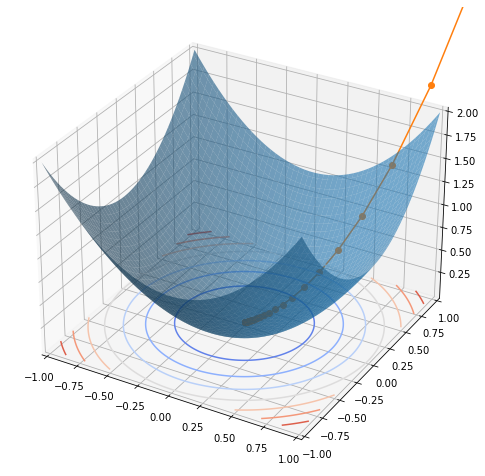

In [73]:
trace = grad_descent(grad_fun, 0.1, 30)
plot_3d(fun, trace=trace)

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:


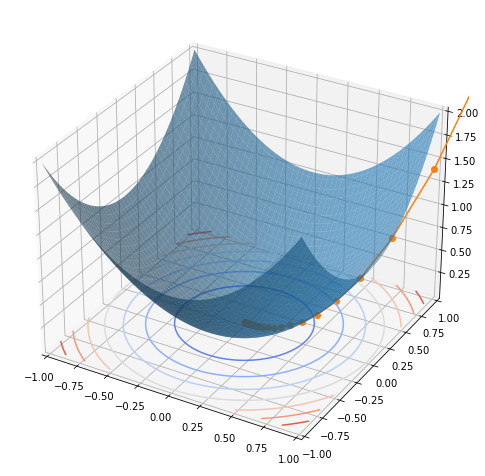

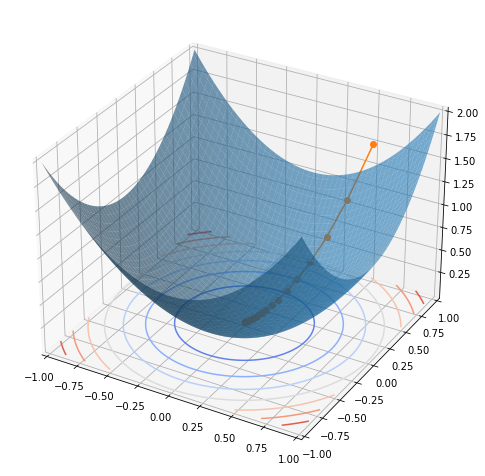

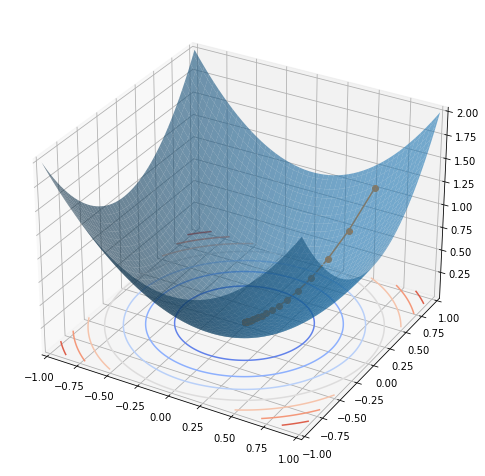

In [74]:

for i in range(3):
    trace = grad_descent(grad_fun, 0.1, 30)
    plot_3d(fun, trace=trace)


Попробуйте разную длину шага из множества (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.


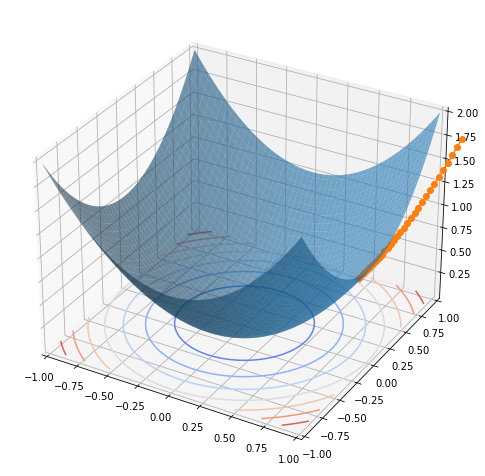

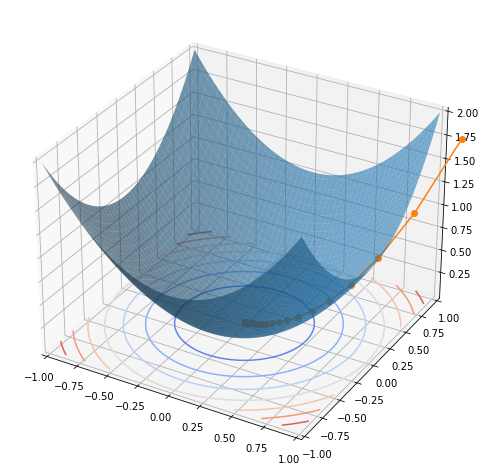

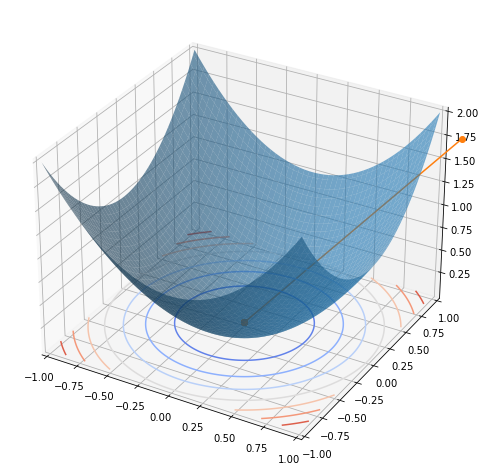

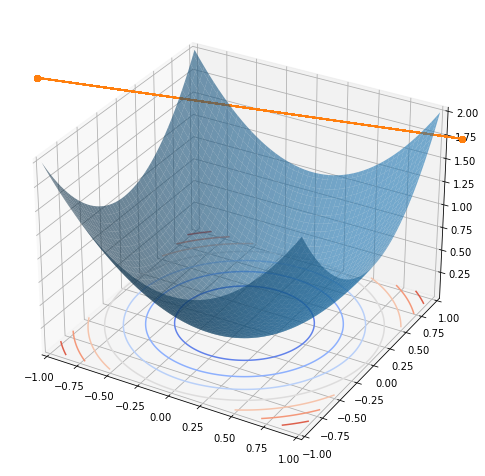

In [75]:
### student's code here

for a in [0.01, 0.1, 0.5, 1]:
    np.random.seed(25)
    trace = grad_descent(grad_fun, a, 30)
    plot_3d(fun, trace=trace)

При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, рассмотрим другую функцию. Оптимизируйте функцию f(x)=x21+5x22, пробуя длину шага (0.01, 0.1, 0.2, 0.5):


In [83]:
### student's code here
def fun2(x1, x2, c1=1, c2=5):
    return c1*(x1**2) + c2*(x2**2)

def grad_fun2(x1, x2, c1=1, c2=5):
    return np.array([c1*2*x1, c2*2*x2])


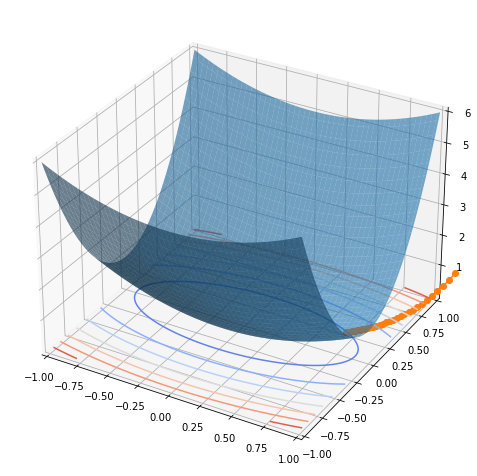

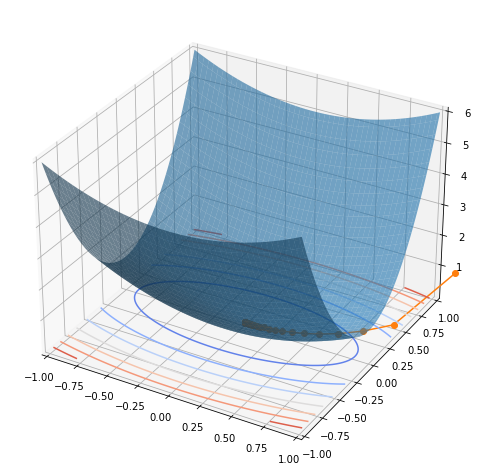

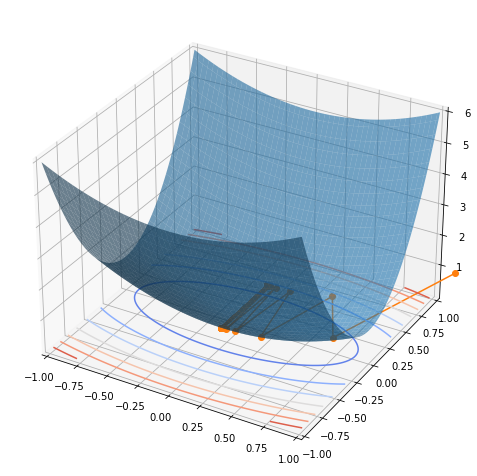

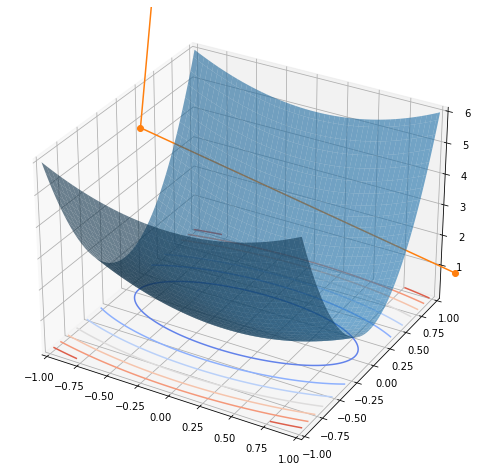

In [84]:
for a in [0.01, 0.1, 0.2, 0.5]:
    np.random.seed(25)
    trace = grad_descent(grad_fun2, a, 30)
    plot_3d(fun2, trace=trace)

"Вытянутую" функцию сложнее оптимизировать. Именно поэтому данные рекомендуется нормировать перед обучением модели, чтобы избежать таких колебаний при оптимизации.

Визуализация траекторий GD и SGD
На простом примере разберём основные тонкости, связанные со стохастической оптимизацией.

Сгенерируем матрицу объекты-признаки X и вектор весов wtrue, вектор целевых переменных y вычислим как Xwtrue и добавим нормальный шум:


In [85]:
np.random.seed(13)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))


Обучим на полученных данных линейную регрессию для MSE при помощи полного градиентного спуска — тем самым получим вектор параметров.

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала:

w(t)=w(t−1)−ηt∇Q(w(t−1)),
где ηt — длина шага градиентного спуска.

Также напомним, что функционал MSE для матриц выглядит так:
Q(w)=(y−Xw)T(y−Xw)
А соответствующий градиент:
∇wQ(w)=∇w[yTy−yTXw−wTXTy+wTXTXw]=0−XTy−XTy+(XTX+XTX)w=2XT(Xw−y)

In [86]:

w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list) 


Покажем последовательность оценок параметров w(t), получаемых в ходе итераций. Красная точка — wtrue.

<ipython-input-87-8d2a45da683f>:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


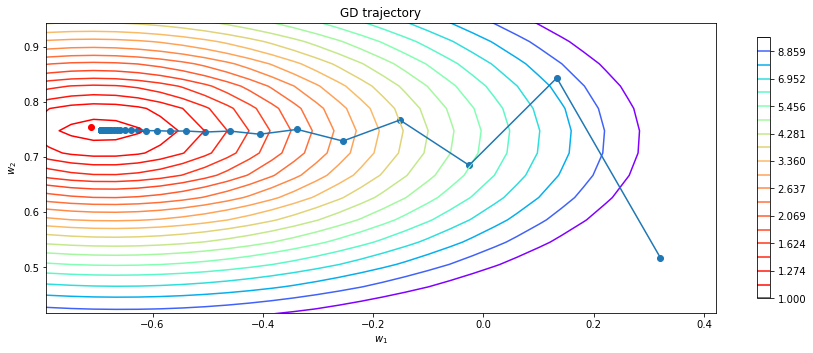

In [87]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(15, 6))
plt.title('GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска. Для большей наглядности в каждой точке пространства посчитаем градиент функционала и покажем его направление.


<ipython-input-88-29e33ec8899b>:14: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


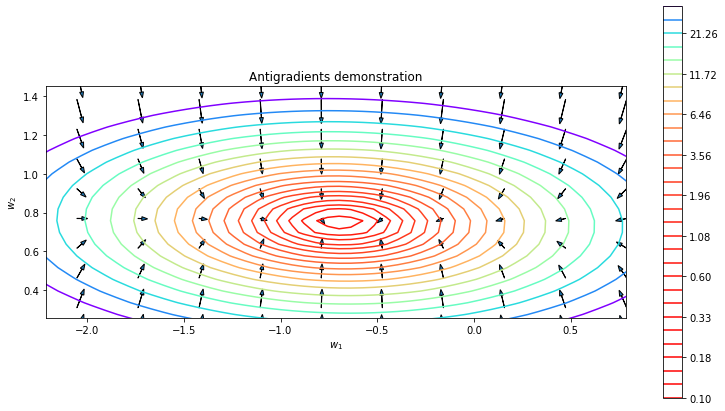

In [88]:

# compute level set
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
A_mini, B_mini = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-2, 2, 27))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
        
# visualize the level set
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
        
# visualize the gradients
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2*1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)

plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .7))
plt.gca().set_aspect('equal')
plt.show()

Визуализируем теперь траектории стохастического градиентного спуска, повторив те же самые действия, оценивая при этом градиент по подвыборке.


In [89]:
w

array([-0.69317475,  0.74895446])

<ipython-input-90-72ef3403a98c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


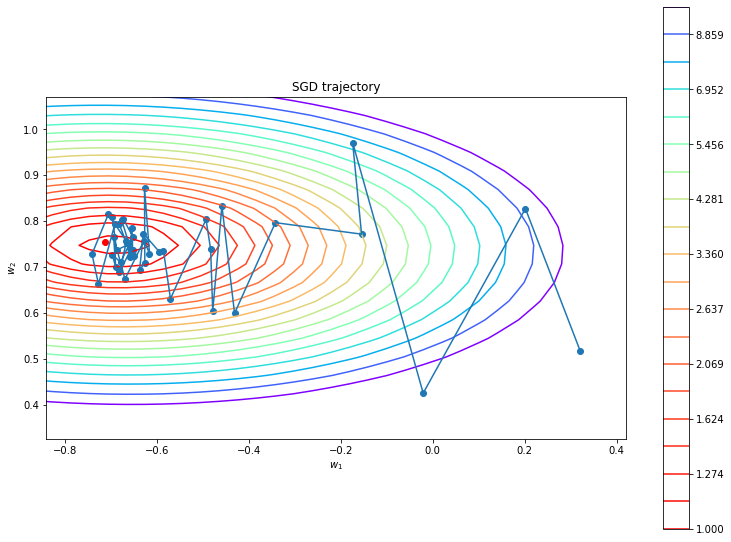

In [90]:

w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2
batch_size = 10

for i in range(num_steps):
    sample = np.random.randint(n_objects, size=batch_size)
    w -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 12))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()


Как видно, метод стохастического градиента «бродит» вокруг оптимума. Для изменения ситуации можно подобрать длину шага градиентного спуска ηt.


<ipython-input-91-c1090bad24ae>:32: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


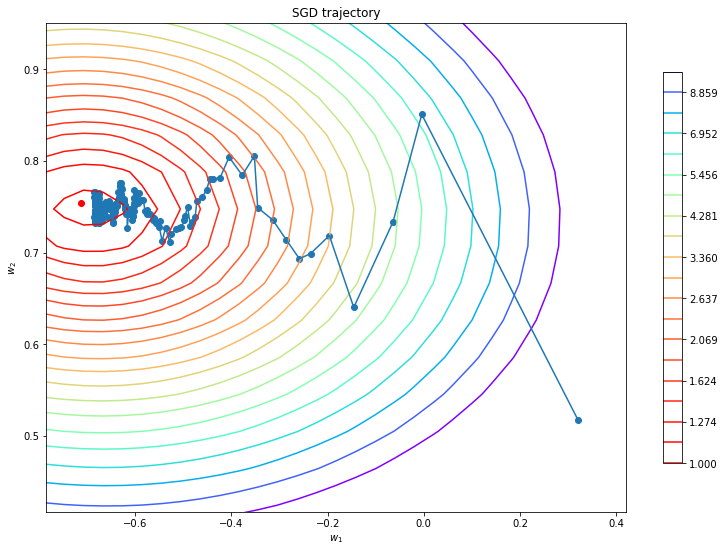

In [91]:
w = w_0.copy()
w_list = [w.copy()]
step_size_0 = 8e-3
num_steps = 300

for i in range(num_steps):
    step_size = step_size_0 / ((i+1)**0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    w -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
#plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()


Сравнение скоростей сходимости
Последнее, что хотелось бы продемонстрировать — сравнение, насколько быстро достигают оптимума метод полного и стохастического градиентного спуска. Сгенерируем выборку и построим график зависимости функционала от итерации.


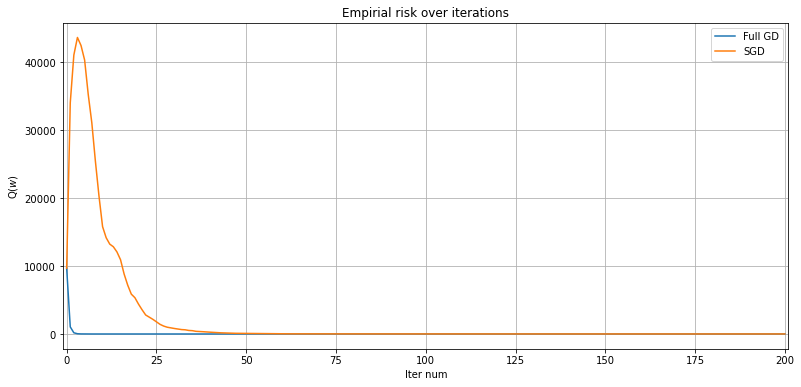

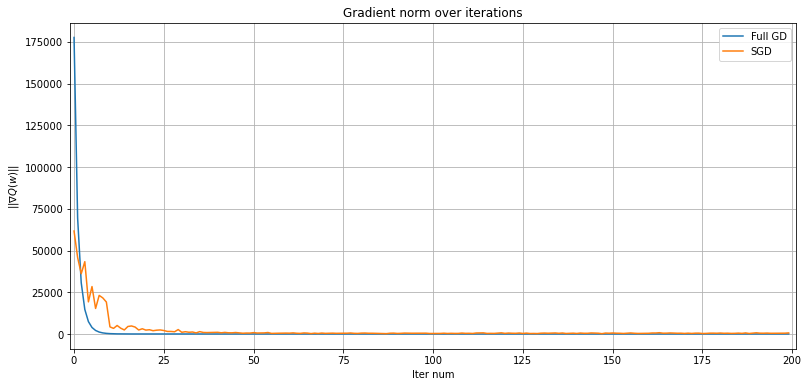

In [92]:

# data generation
n_features = 50
n_objects = 1000
num_steps = 200
batch_size = 10

w_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)
from scipy.linalg import norm

step_size_sgd = 1e-2
step_size_gd = 1e-2
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

norm_sgd = []
norm_gd = []


for i in range(num_steps):
    step_size = step_size_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    
    w_sgd -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample]) / batch_size
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    norm_sgd.append(norm(np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])))
    
    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))
    norm_gd.append(norm(np.dot(X.T, np.dot(X, w_gd) - Y)))
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), residuals_gd, label='Full GD')
plt.plot(range(num_steps+1), residuals_sgd, label='SGD')

plt.title('Empirial risk over iterations')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps), norm_gd, label='Full GD')
plt.plot(range(num_steps), norm_sgd, label='SGD')

plt.title('Gradient norm over iterations')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'$||\nabla Q$($w$)||')
plt.grid()
plt.show()


### Решение задач из ноутбука с ElasticNet (которое ранее пропустил)


 ... Добавим одновременно и L1, и L2 регуляризацию.
У ElasticNet два параметра: alpha и l1_ratio. Используйте ElasticNet со значениями параметров alpha и l1_ratio 
равными 0.5.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
    
    from sklearn.linear_model import ElasticNet
    

##### для начала подготовим данные

In [50]:
import pandas as p


In [51]:
data = pd.read_csv('BlackFriday.csv')
data = data.fillna(0)

In [52]:
def map_gen(Gender):
    if Gender == 'F':
        return 0
    elif Gender == 'M':
        return 1
data['Gender'] = data['Gender'].apply(map_gen)

In [53]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    elif age == '55+':
        return 6
    
        
data['Age'] = data['Age'].apply(map_age)

In [54]:
data = pd.get_dummies(data, columns=['City_Category'], dtype=int)

In [55]:
def map_stay(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == '0':
        return 0
    elif Stay_In_Current_City_Years == '1':
        return 1
    elif Stay_In_Current_City_Years == '2':
        return 2
    elif Stay_In_Current_City_Years == '3':
        return 3
    elif Stay_In_Current_City_Years == '4+':
        return 4
    #your code here
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)

In [56]:
data = data.drop(['User_ID', 'Product_ID'], axis = 1)

In [100]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import numpy as np


X = data.copy()

y = data['Purchase']
X.drop(['Purchase'], axis=1, inplace=True)

indices = np.arange(len(X))
Xtrain, Xtest, ytrain, ytest, idx_train, idx_test = train_test_split(
                                                    X, y, indices, test_size=0.2, random_state=111)

In [101]:
RegElaNet = ElasticNet(alpha=0.5, l1_ratio=0.5)

y_pred = RegElaNet.fit(Xtrain, ytrain).predict(Xtest)
r2_score_reg = r2_score(ytest, y_pred)
print(RegElaNet)
print("r^2 on test data : %f" % r2_score_reg)

ElasticNet(alpha=0.5)
r^2 on test data : 0.148096


In [102]:
print(RegElaNet.coef_)

[ 202.83662089   96.35403143    7.88429832   11.78968363  -15.43060515
 -345.67534711   11.83365392  144.43343494 -134.22777585  -66.82981126
  202.05214312]


In [103]:
RegElaNet = ElasticNet(alpha=10, l1_ratio=0.3)

y_pred = RegElaNet.fit(Xtrain, ytrain).predict(Xtest)
r2_score_reg = r2_score(ytest, y_pred)
print(RegElaNet)
print("r^2 on test data : %f" % r2_score_reg)

ElasticNet(alpha=10, l1_ratio=0.3)
r^2 on test data : 0.138556


In [104]:
print(RegElaNet.coef_)

[  12.87740823   20.13346588   10.22565335    2.78377205    0.37024251
 -241.08802577   14.32044122  145.44164064  -10.03640887   -5.55192099
   16.01690093]


ElacticNet c alpha=0.5, l1_ratio=0.5 показывает меньший r2_score чем рассматриваемые ранее на тех же выборках  модели LinearRegression, Lasso, Ridge